<a href="https://colab.research.google.com/github/JorgeGaitanDev/curso_computacion_cuantica/blob/patch-6/jorge_eliecer_Gaitan_Heredia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
__authors__    = "Jorge Eliecer Gaitan Heredia"
__credits__   = ["Jorge Eliecer Gaitan Heredia"]
__copyright_amp__ = "(c) Jorge Eliecer Gaitan Heredia"
__email__   = "jegaitanh@correo.udistrital.edu.co"

# uutilizamos unittest en python para este proyecto

#Primero que todo debemos saber que es el "Algoritmo de Grover".
- El algoritmo de Grover es uno de los algoritmos cuánticos más famosos introducido por Lov Grover en 1996. Inicialmente, se propuso para problemas de búsqueda no estructurados, es decir, para encontrar un elemento marcado en una base de datos no estructurada. Sin embargo, el algoritmo de Grover es ahora una subrutina de varios otros algoritmos, como Grover Adaptive Search [2]. Para obtener más información sobre el algoritmo de Grover, consulta Grover’s Algorithm en el libro de texto de Qiskit.

Qiskit implementa el algoritmo de Grover en la clase Grover. Esta clase también incluye la versión generalizada, Amplificación de Amplitud [3], y permite configurar iteraciones individuales y otros meta-ajustes para el algoritmo de Grover.

#Para ejecutar el algoritmo de Grover.
- Cuando ejecutamos el algoritmo de Grover con la clase "Grover", en primer lugar, necesitamos especificar un oráculo para el circuito del algoritmo de Grover yuamos QuantumCircuit como el oráculo del algoritmo de Grover. Sin embargo, hay varias otras clases que podemos usar como oráculo del algoritmo de Grover.

Para este algoritmo hay que tener en cuenta que el oráculo para Grover debe ser un oráculo de cambio de fase. Es decir, multiplica las amplitudes de los “estados correctos” por un factor de (punto).

##Inicialmente configuramos una cuenta en ***IBM Quantum Experience*** para poder desarrollar esta aplicación.

In [ ]:
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-qu7_p6s_
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-qu7_p6s_


Importamos en este notebook la implemenatación del algoritmo de busqueda de Grover y utilizaremos Qiskit con diferentes oraculos para su desarrollo.
- Iniciamos importando pylab y numpy y a su vez qiskit para poder utilizar "aer_simulator" y otros factores para su visible implementación

In [ ]:
import pylab
import numpy as np
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.tools.visualization import plot_histogram
from qiskit.algorithms import Grover, AmplificationProblem
from qiskit.circuit.library.phase_oracle import PhaseOracle

Primero veremos como ncontrar soluciones a los problemas 3-SAT.

1. Vemos una solucion del problema de 3-Satisfabilidad (3-SAT) y vamos cómo podemos usar la búsqueda cuántica para encontrar sus soluciones satisfactorias. Los problemas de 3-SAT buscando la informacion necesaria, generalmente se expresan en Formas normales conjuntivas (Conjunctive Normal Forms, CNF) y se escriben en el formato DIMACS-CNF (segun lo investigado).

2. Traere unos valores de prueba como se muestra a continuación

In [ ]:
input_3sat_instance = '''
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''

En el CNF de esta instancia 3-SAT se observa que contiene 3 variables y 5 cláusulas:

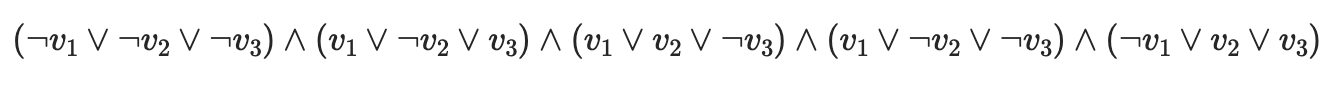

Podemos verificar que esta instancia de problema 3-SAT tiene tres soluciones satisfactorias:

 Donde V1, V2, V3 son iguales a (T, F, T) a (F, F, F) y (T, T, F)

O expresado usando la notación DIMACS donde los numeros negativos son "FALSE" y los positivos son "TRUE":
$$
\begin{array}{l}
(1, -2, 3) \\
(-1, -2, -3) \\
(1, 2, -3)
\end{array}
$$

Con esta entrada a este problema, creamos el oracle correspondiente para nuestra búsqueda de Grover. En particular, utilizamos el componente PhaseOracle, que admite el análisis de cadenas de formato DIMACS-CNF y la construcción del correspondiente circuito de oráculo necesariamente.

In [ ]:
import os
import tempfile
from qiskit.exceptions import MissingOptionalLibraryError

fp = tempfile.NamedTemporaryFile(mode='w+t', delete=False)
fp.write(input_3sat_instance)
file_name = fp.name
fp.close()
oracle = None
try:
    oracle = PhaseOracle.from_dimacs_file(file_name)
except MissingOptionalLibraryError as ex:
    print(ex)
finally:
    os.remove(file_name)

Digitado lo anterior podemos afirmar que "oracle" se puede utilizar para la instacia de Grover.

In [ ]:
problem = None
if oracle is not None:
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)

Después podemos configurar el backend y ejecutar la instancia de Grover para obtener el resultado:

- Usaremos "Aer" para simular todo el proceso.

In [ ]:
backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
grover = Grover(quantum_instance=quantum_instance)
result = None
if problem is not None:
    result = grover.amplify(problem)
    print(result.assignment)

011


Como se vio anteriormente, se obtiene una solución satisfactoria al problema 3-SAT especificado. Y de hecho es una de las tres soluciones satisfactorias.

- Dado que utilizamos el 'aer_simulator', también es devuelto el resultado de la medición completa, como se muestra en la gráfica a continuación, donde se puede ver que las cadenas binarias 
$$
\begin{array}{l}
000 \\
011 \\
101
\end{array}
$$

Observamos el orden de los bits en cada cadena, correspondientes a las tres soluciones satisfactorias, tienen todas altas probabilidades asociadas.

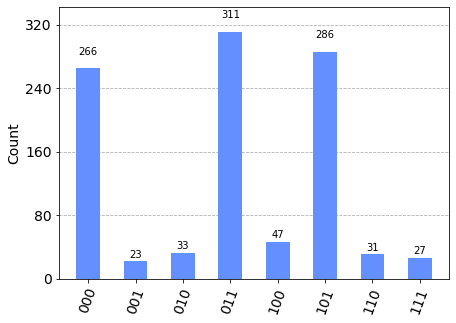

In [ ]:
if result is not None:
    display(plot_histogram(result.circuit_results[0]))

Luego vamos a realizar unas expresiones lógicas booleanas para ver su comportamiento.

- Observamos que el Grover de Qiskit también se puede utilizar para realizar búsquedas cuánticas en un Oracle construido a partir de otros medios, además de DIMACS. Con esto quiero decir que, el PhaseOracle se puede configurar utilizando expresiones lógicas booleanas arbitrarias, como se muestra en el apartado de siguiente.

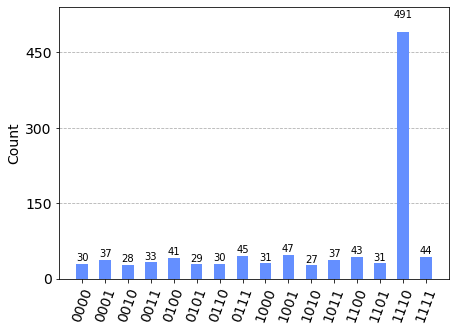

In [ ]:
expression = '(w ^ x) & ~(y ^ z) & (x & y & z)'
try:
    oracle = PhaseOracle(expression)
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
    grover = Grover(quantum_instance=QuantumInstance(Aer.get_backend('aer_simulator'), shots=1024))
    result = grover.amplify(problem)
    display(plot_histogram(result.circuit_results[0]))
except MissingOptionalLibraryError as ex:
    print(ex)

La estructura anterior, la expresión lógica booleana de entrada '(w ^ x) & ~(y ^ z) & (x & y & z)' es bastante comprendida, debido a que ^, ~, y & representan los operadores lógicos booleanos XOR, NOT y AND, como se aprendio a lo largo del curso de cuántica. 
- En base a esto es bastante fácil descubrir la solución satisfactoria examinando sus partes: w ^ x que requiere que w y x tomen valores diferentes; ~(y ^ z) requiere que y y z sean iguales; x & y & z dicta que los tres sean True. Al juntarlos, obtenemos la solución satisfactoria (w, x, y, z) = (False, True, True, True), con lo que el resultado de nuestro Grover concuerda.

Ahora vamos a implementar la "Amplificación de Amplitud" en el proyecto.

In [ ]:
from qiskit import QuantumCircuit
from qiskit.algorithms import AmplificationProblem



In [ ]:
pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#El estado que deseamos encontrar en este caso es '11'.
- Enotnces especificamos el oráculo que marca el estado "11" como una buena solución.
- Definimos el algoritmo de Grover 
- Ahora podemos echar un vistazo al operador Grover que se utiliza en la ejecución del algoritmo

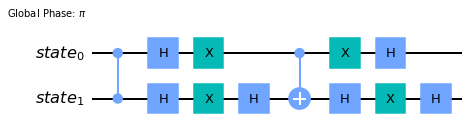

In [ ]:
good_state = ['11']

oracle = QuantumCircuit(2)
oracle.cz(0, 1)

problem = AmplificationProblem(oracle, is_good_state=good_state)

# Los circuitos del algoritmo se envuelven en una puerta para aparecer en la composición como un bloque
# así que tenemos que descomponer() el op para verlo expandido en sus compuertas componentes.
problem.grover_operator.decompose().draw(output='mpl')

In [ ]:
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Grover

aer_simulator = Aer.get_backend('aer_simulator')
grover = Grover(quantum_instance=aer_simulator)
result = grover.amplify(problem)
print('Result type:', type(result))
print()
print('Success!' if result.oracle_evaluation else 'Failure!')
print('Top measurement:', result.top_measurement)

Result type: <class 'qiskit.algorithms.amplitude_amplifiers.grover.GroverResult'>

Success!
Top measurement: 11


En el proyecto, el resultado de top_measurement es 11 que es un “estado correcto”. Por lo tanto, logramos encontrar la respuesta usando Grover.

- En el apartado anterior, usamos QuantumCircuit como el oráculo de Grover. Sin embargo, también podemos usar qiskit.quantum_info.Statevector como oráculo. De esa manera todos los siguientes procesos |11> son el “estado correcto”.

In [ ]:
from qiskit.quantum_info import Statevector
oracle = Statevector.from_label('11')
problem = AmplificationProblem(oracle, is_good_state=['11'])

grover = Grover(quantum_instance=aer_simulator)
result = grover.amplify(problem)
print('Result type:', type(result))
print()
print('Success!' if result.oracle_evaluation else 'Failure!')
print('Top measurement:', result.top_measurement)

Result type: <class 'qiskit.algorithms.amplitude_amplifiers.grover.GroverResult'>

Success!
Top measurement: 11


#Ahora internamente asignamos a un circuito cuántico para ver si comportamiento.

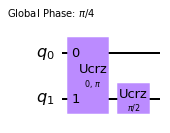

In [ ]:
problem.grover_operator.oracle.decompose().draw(output='mpl')

Lo bueno de implementar Qiskit, es que permite una fácil construcción de oráculos más complejos: PhaseOracle: para analizar expresiones lógicas como '~a | b'. Esto es especialmente útil para resolver problemas de 3-SAT.

- Aquí usaremos el PhaseOracle para el ejemplo simple de encontrar el estado |11>, que corresponde a 'a & b'.

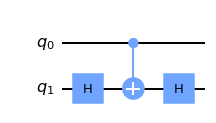

In [ ]:
from qiskit.circuit.library.phase_oracle import PhaseOracle
from qiskit.exceptions import MissingOptionalLibraryError

# `Oracle` (`PhaseOracle`) as the `oracle` argument
expression = '(a & b)'
try:
    oracle = PhaseOracle(expression)
    problem = AmplificationProblem(oracle)
    display(problem.grover_operator.oracle.decompose().draw(output='mpl'))
except MissingOptionalLibraryError as ex:
    print(ex)

#Preparamos el estado para este caso.
Utilizamos un argumento state_preparation para especificar un circuito cuántico que prepara un estado cuántico para el punto de inicio de la amplificación de amplitud. Por defecto, un circuito con  se usa para preparar una superposición uniforme (por lo que será la búsqueda de Grover). El circuito de difusión de la amplificación de amplitud refleja el state_preparation automáticamente.

state preparation circuit:


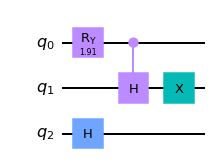

In [ ]:

# Especificando `state_preparation` para preparar una superposición de |01>, |10>, y |11>
oracle = QuantumCircuit(3)
oracle.h(2)
oracle.ccx(0,1,2)
oracle.h(2)

theta = 2 * np.arccos(1 / np.sqrt(3))
state_preparation = QuantumCircuit(3)
state_preparation.ry(theta, 0)
state_preparation.ch(0,1)
state_preparation.x(1)
state_preparation.h(2)

# Sólo nos importa que los dos primeros bits estén en estado 1, por lo que añadimos ambas posibilidades para el último qubit
problem = AmplificationProblem(oracle, state_preparation=state_preparation, is_good_state=['110', '111'])

# state_preparation
print('state preparation circuit:')
problem.grover_operator.state_preparation.draw(output='mpl')

Importamos GroverOperator para:
- imaginemos que el estado correcto es un estado de tres qubits  pero usamos 2 qubits adicionales como qubits auxiliares.

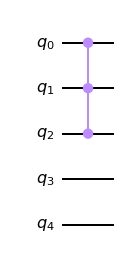

In [ ]:
from qiskit.circuit.library import GroverOperator, ZGate

oracle = QuantumCircuit(5)
oracle.append(ZGate().control(2), [0, 1, 2])
oracle.draw(output='mpl')

Luego, por defecto, el operador Grover implementa la reflexión cero en los cinco qubits.

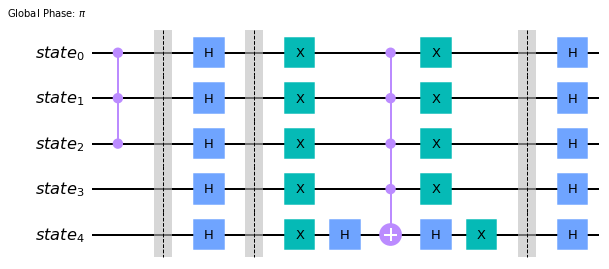

In [ ]:
grover_op = GroverOperator(oracle, insert_barriers=True)
grover_op.decompose().draw(output='mpl')

Pero sabemos que solo debemos considerar los tres primeros:

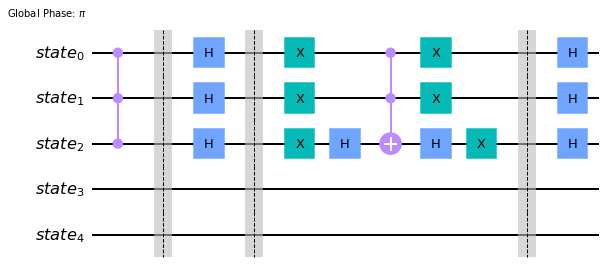

In [ ]:
grover_op = GroverOperator(oracle, reflection_qubits=[0, 1, 2], insert_barriers=True)
grover_op.decompose().draw(output='mpl')

#Luego especificamos el "good_state".

In [ ]:
# una lista de cadenas binarias buen estado
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
good_state = ['11', '00']
problem = AmplificationProblem(oracle, is_good_state=good_state)
print(problem.is_good_state('11'))

True


In [ ]:
# una lista de enteros buen estado
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
good_state = [0, 1]
problem = AmplificationProblem(oracle, is_good_state=good_state)
print(problem.is_good_state('11'))

True


In [ ]:
from qiskit.quantum_info import Statevector

# `Statevector` buen estado
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
good_state = Statevector.from_label('11')
problem = AmplificationProblem(oracle, is_good_state=good_state)
print(problem.is_good_state('11'))

True


In [ ]:
# Buen estado invocable
def callable_good_state(bitstr):
    if bitstr == "11":
        return True
    return False

oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=good_state)
print(problem.is_good_state('11'))

True


#El número de "iterations"
El número de repeticiones de aplicar el operador de Grover es importante para obtener el resultado correcto con el algoritmo de Grover. El número de iteraciones se puede establecer mediante el argumento "iteration" de "Grover".

In [ ]:
# iteracion entera
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=['11'])
grover = Grover(iterations=1)

In [ ]:
# iteración de listas
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=['11'])
grover = Grover(iterations=[1, 2, 3])

In [ ]:
# using sample_from_iterations
oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=['11'])
grover = Grover(iterations=[1, 2, 3], sample_from_iterations=True)

Cuando se conoce el número de soluciones, también podemos usar un método estático optimal_num_iterations para encontrar el número óptimo de iteraciones. Pero hay que tener en cuenta que las iteraciones de salida son un valor aproximado. Cuando el número de qubits es pequeño, las iteraciones de salida pueden no ser óptimas.


In [ ]:
iterations = Grover.optimal_num_iterations(num_solutions=1, num_qubits=8)
iterations

12

##PARA FINALIZAR CON EL PROYECTO
Aplicamos post_processing
- Podemos aplicar un posprocesamiento opcional a la medición superior para facilitar la lectura. Se puede utilizar, por ejemplo, para convertir de la representación de bits de la medición [1, 0, 1] a un formato DIMACS CNF [1, -2, 3].

In [ ]:
def to_DIAMACS_CNF_format(bit_rep):
    return [index+1 if val==1 else -1 * (index + 1) for index, val in enumerate(bit_rep)]

oracle = QuantumCircuit(2)
oracle.cz(0, 1)
problem = AmplificationProblem(oracle, is_good_state=['11'], post_processing=to_DIAMACS_CNF_format)
problem.post_processing([1, 0, 1])

[1, -2, 3]

##PROYECTO FINALIZADO.
- GRACIAS POR TOMARSE EL TIEMPO DE REVISAR TODO EL PROYECTO.